<a href="https://colab.research.google.com/github/LCaravaggio/DeepLearning_ITBA/blob/main/NLP/TP/06_glove_tests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Agregar este archivo a la carpeta de google drive clickeando en el link y clickeando el '+' arriba a la derecha

https://drive.google.com/open?id=1jJ20oNZIysi-V-iORAE0eEZq4LhuWxUW

In [2]:
import codecs
import numpy as np

In [ ]:
# ! wget http://nlp.stanford.edu/data/glove.6B.zip

In [ ]:
# ! unzip glove.6B.zip

In [3]:
def load_embeddings(file, embed_dim=100):
  #load embeddings

  print('loading word embeddings...')
  embeddings_index = {}
  f = codecs.open('/content/drive/MyDrive/glove.6B.100d.txt', encoding='utf-8')
  for line in f:
      values = line.rstrip().rsplit(' ')
      word = values[0]
      coefs = np.asarray(values[1:], dtype='float32')
      embeddings_index[word] = coefs
  f.close()
  print('found %s word vectors' % len(embeddings_index))
  return embeddings_index

In [5]:
# embeddings_index = load_embeddings(EMBEDDING_DIR+'glove.6B.300d.txt', embed_dim=300)
embeddings_index = load_embeddings('/content/drive/MyDrive/glove.6B.100d.txt')

loading word embeddings...
found 400000 word vectors


In [8]:
# Armar matriz de embedigs de 400000x100
matrix_word_vectors = np.array(list(embeddings_index.values()))
# Aramr lista con vocabilario
vocab_list = np.array(list(embeddings_index.keys()))

In [9]:
matrix_word_vectors.shape

(400000, 100)

In [10]:
from sklearn.neighbors import NearestNeighbors

# Entrenar un modelo de Nearest neighbours con los 20 primeros y distancia coseno

In [11]:
nearest = NearestNeighbors(n_neighbors=20, metric='cosine')

In [12]:
# Entrenar modelo
nearest.fit(matrix_word_vectors)

NearestNeighbors(metric='cosine', n_neighbors=20)

In [17]:
def get_analogy(word1, word2, word3, embeddings_index=embeddings_index):
  # word1 es a word2 como word3 es a word4
  word4 = embeddings_index[word2] - embeddings_index[word1] + embeddings_index[word3] 
  return word4

In [14]:
def get_nearests_words(vector, nearest=nearest):
  # Dado un vector, tiene que devolver la lista de los 20 mas cercanos
  words_list = []
  distances, nearest_indexes = nearest.kneighbors(vector.reshape(1, -1))
  
  for idx in nearest_indexes[0]:
    words_list.append(vocab_list[idx])
  return words_list 

In [20]:
# Probar las siguientes analogías
#
# woman -> man, queen -> ?
# england -> london, france-> ?
# woman -> women, man -> ?
# messi -> soccer, federer -> ?
# switzerland -> alps, argentina ->

analogy_vector = get_analogy('england', 'london', 'france')

In [21]:
analogy_vector

array([ 1.1343321 , -0.537176  , -0.47918996,  1.1064501 ,  1.60882   ,
       -0.88728   , -0.29966304,  0.65577996,  1.0841546 ,  0.52755   ,
        0.08417211,  0.17623201, -0.24404001,  0.60032004, -0.94842   ,
        0.6786555 , -0.599765  , -1.360628  , -0.48759994, -0.93453   ,
        0.61581   , -0.12478006,  0.04714003, -0.68354005,  1.28919   ,
       -1.48541   ,  0.36576003, -0.66876   ,  1.382918  , -0.20389998,
       -0.76826996, -0.81161   , -0.39170998, -0.24032545,  0.03382999,
        1.761802  ,  1.618391  ,  0.14480999, -0.549     , -0.13945   ,
        0.04356003, -0.76247   , -0.72239   , -0.05572999,  0.28969002,
        0.22275001, -0.90976   , -0.372613  ,  0.29368004, -0.47819   ,
        0.34187   ,  0.89163196,  0.31196207,  1.45491   , -2.0659301 ,
       -2.6932    ,  0.10069398,  0.767375  ,  1.41179   , -0.061993  ,
        0.63731   , -0.11496502, -0.638608  , -0.92399895, -0.01384199,
        0.00521001, -1.1867701 ,  0.47264   ,  0.74248403,  0.57

In [22]:
# Probar función get_nearests_words
get_nearests_words(analogy_vector)

['paris',
 'france',
 'brussels',
 'london',
 'french',
 'prohertrib',
 'britain',
 'berlin',
 'amsterdam',
 'vienna',
 'moscow',
 'gaulle',
 'europe',
 'belgium',
 'chirac',
 'frankfurt',
 'european',
 'luxembourg',
 'strasbourg',
 'sarkozy']

In [23]:
animals = ['dog',
 'cat',
 'dogs',
 'pet',
 'puppy',
 'horse',
 'animal',
 'pig',
 'boy',
 'cats',
 'rabbit',
 'goat',
 'sled',
 'monkey',
 'cow',
 'rat',
 'breed',
 'mad',
 'hound',
 'bird']

In [24]:
transport = ['car',
 'vehicle',
 'truck',
 'cars',
 'driver',
 'driving',
 'motorcycle',
 'vehicles',
 'parked',
 'bus',
 'taxi',
 'suv',
 'pickup',
 'jeep',
 'mercedes',
 'cab',
 'bicycle',
 'drivers',
 'automobile',
 'train']

In [25]:
countries = ['argentina',
 'england',
 'australia',
 'spain',
 'brazil',
 'portugal',
 'zealand',
 'scotland',
 'match',
 'africa',
 'wales',
 'ireland',
 'italy',
 'matches',
 'france',
 'indies',
 'uruguay',
 'britain',
 'netherlands',
 'united']

In [26]:
professions = ['engineer',
 'scientist',
 'economist',
 'professor',
 'consultant',
 'director',
 'dr.',
 'doctor',
 'researcher',
 'expert',
 'physician',
 'officer',
 'surgeon',
 'chief',
 'assistant',
 'specialist',
 'associate',
 'author',
 'worked',
 'psychologist']

In [27]:
all_words = animals + transport + countries + professions

In [28]:
vectors_subset = np.array([embeddings_index[word] for word in all_words])

In [29]:
from sklearn.manifold import TSNE

In [30]:
tsne = TSNE(2, verbose=1)

In [31]:
%time embed_2d_tsne = tsne.fit_transform(vectors_subset)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 79 nearest neighbors...
[t-SNE] Indexed 80 samples in 0.000s...
[t-SNE] Computed neighbors for 80 samples in 0.016s...
[t-SNE] Computed conditional probabilities for sample 80 / 80
[t-SNE] Mean sigma: 3.172693
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.447983
[t-SNE] KL divergence after 1000 iterations: 0.235835
CPU times: user 1.07 s, sys: 57.5 ms, total: 1.13 s
Wall time: 741 ms


In [32]:
from matplotlib import pyplot as plt

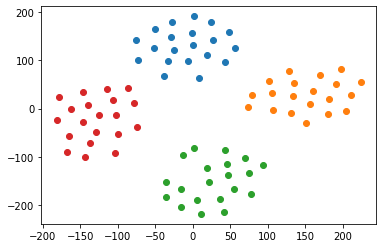

In [33]:
for i in range(4):
  plt.scatter(embed_2d_tsne[i*20:(i+1)*20,0], embed_2d_tsne[i*20:(i+1)*20,1], c=f'C{i}')